In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Muat data dari file CSV
data = pd.read_csv('World-happiness-report-2024.csv')
# Periksa nama-nama kolom dalam data
print(data.columns)
# Periksa beberapa baris pertama data
print(data.head())

Index(['Country name', 'Regional indicator', 'Ladder score', 'upperwhisker',
       'lowerwhisker', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')
  Country name            Regional indicator  Ladder score  upperwhisker  \
0      Finland                Western Europe         7.741         7.815   
1      Denmark                Western Europe         7.583         7.665   
2      Iceland                Western Europe         7.525         7.618   
3       Sweden                Western Europe         7.344         7.422   
4       Israel  Middle East and North Africa         7.341         7.405   

   lowerwhisker  Log GDP per capita  Social support  Healthy life expectancy  \
0         7.667               1.844           1.572                    0.695   
1         7.500               1.908           1.520                    0.699   
2

Menentukan 10 besar 

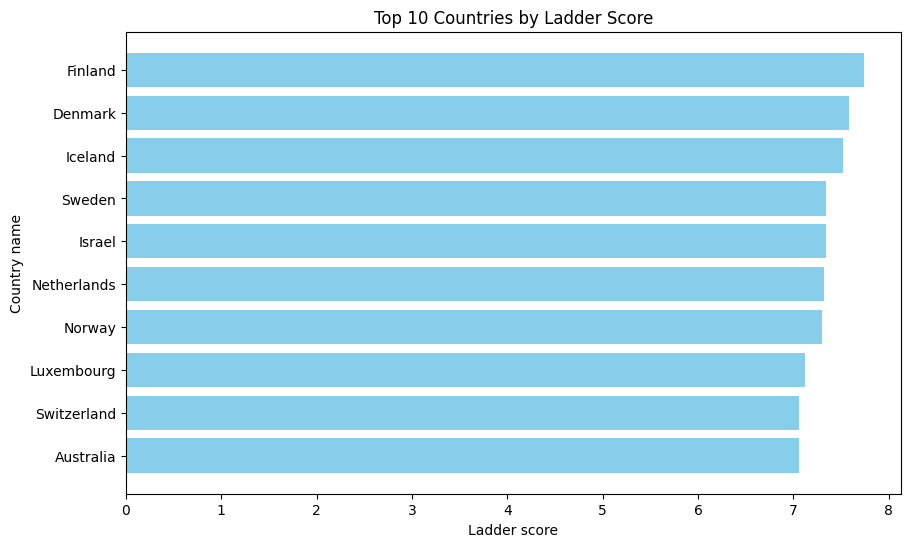

In [2]:

# Urutkan DataFrame berdasarkan 'Ladder score' dalam urutan menurun
sorted_df = data.sort_values(by='Ladder score', ascending=False)

# Ambil 10 negara teratas dari DataFrame yang sudah diurutkan
top_10 = sorted_df.head(10)

# Plot diagram batang
plt.figure(figsize=(10, 6))
plt.barh(top_10['Country name'], top_10['Ladder score'], color='skyblue')
plt.xlabel('Ladder score')
plt.ylabel('Country name')
plt.title('Top 10 Countries by Ladder Score')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score at the top
plt.show()

Eksplorasi data

       Ladder score  upperwhisker  lowerwhisker  Log GDP per capita  \
count    143.000000    143.000000    143.000000          140.000000   
mean       5.527580      5.641175      5.413972            1.378807   
std        1.170717      1.155008      1.187133            0.425098   
min        1.721000      1.775000      1.667000            0.000000   
25%        4.726000      4.845500      4.606000            1.077750   
50%        5.785000      5.895000      5.674000            1.431500   
75%        6.416000      6.507500      6.319000            1.741500   
max        7.741000      7.815000      7.667000            2.141000   

       Social support  Healthy life expectancy  Freedom to make life choices  \
count      140.000000               140.000000                    140.000000   
mean         1.134329                 0.520886                      0.620621   
std          0.333317                 0.164923                      0.162492   
min          0.000000                 0.

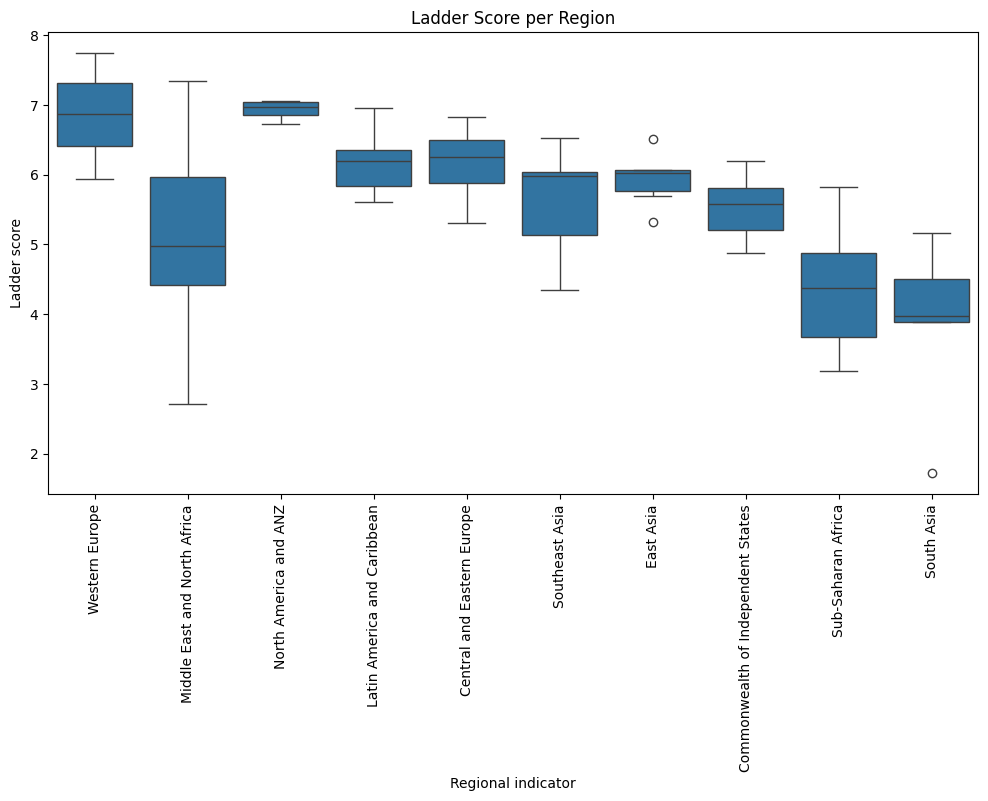

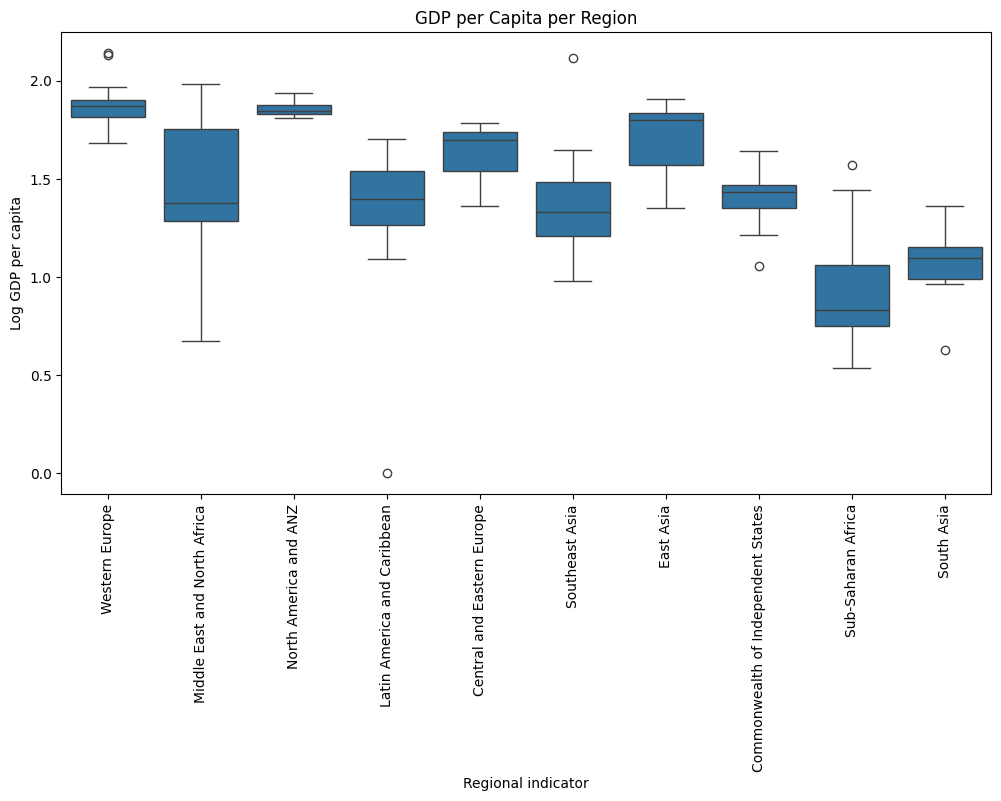

In [3]:
# Statistik deskriptif
print(data.describe())
# Visualisasi skor kebahagiaan per wilayah
plt.figure(figsize=(12, 6))
sns.boxplot(x='Regional indicator', y='Ladder score', data=data)
plt.xticks(rotation=90)
plt.title('Ladder Score per Region')
plt.show()

# Visualisasi faktor-faktor lain per wilayah
plt.figure(figsize=(12, 6))
sns.boxplot(x='Regional indicator', y='Log GDP per capita', data=data)
plt.xticks(rotation=90)
plt.title('GDP per Capita per Region')
plt.show()


In [4]:
# Encode fitur kategorikal 'Regional indicator' menjadi numerik
label_encoder = LabelEncoder()
data['Regional indicator'] = label_encoder.fit_transform(data['Regional indicator'])

# Definisikan fitur dan target
features = data[['Ladder score', 'Log GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
target = data['Regional indicator']

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.00      0.00      0.00         1
           2       1.00      0.00      0.00         1
           3       0.50      0.60      0.55         5
           4       0.50      0.17      0.25         6
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.86      0.86      0.86         7
           9       0.20      0.50      0.29         2

    accuracy                           0.52        29
   macro avg       0.41      0.31      0.29        29
weighted avg       0.58      0.52      0.51        29

Confusion Matrix:
[[4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 2 0 3 0 0 0 0 0 0]
 [0 0 0 2 1 0 0 0 1 2]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 

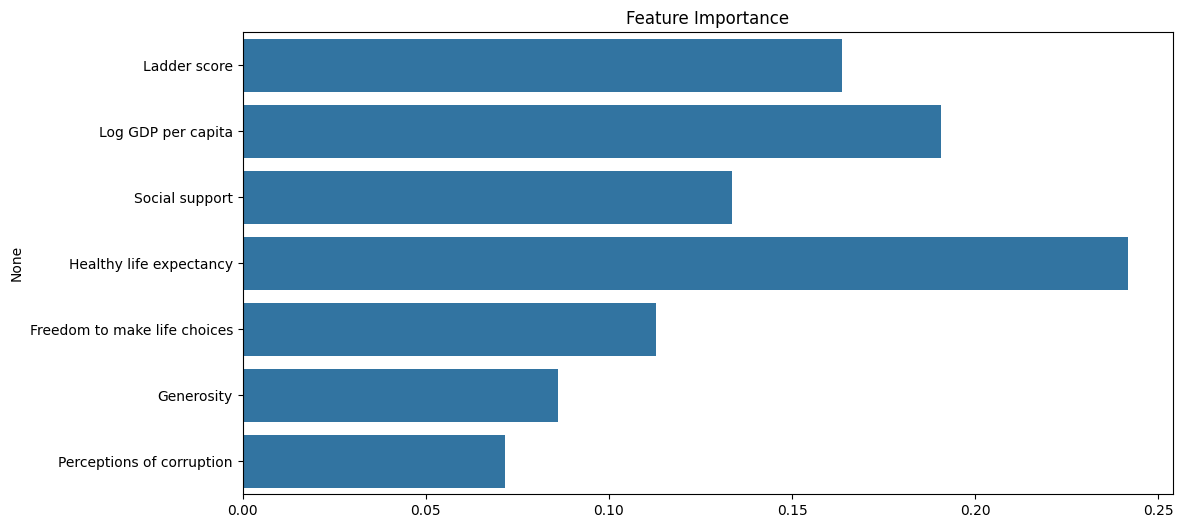

In [5]:
# Buat model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi kinerja model
print("Classification Report:")
print(classification_report(y_test, y_pred,zero_division=1))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualisasi feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=model.feature_importances_, y=features.columns)
plt.title('Feature Importance')
plt.show()
